In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.models import Sequential  # 건물,  뇌
from keras.layers import Dense       # 각 층, 뉴런의 모음
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
x = np.random.uniform(-np.pi, np.pi, 500)

In [5]:
y = np.random.uniform(-1, 1, 500)

In [6]:
print(x[:5])  # x axis

[2.49956765 1.93795533 1.59654478 1.41061069 0.84089124]


In [7]:
print(y[:5]) # y axis

[0.40919365 0.69106856 0.41586928 0.30261307 0.84438216]


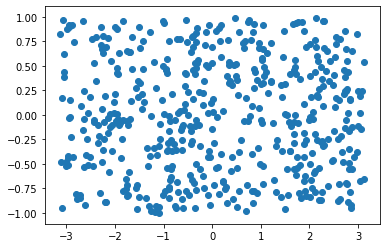

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
X = np.array( [ [x[i], y[i]] for i in range(500) ] )

In [10]:
X.shape

(500, 2)

In [11]:
X[:5]

array([[2.49956765, 0.40919365],
       [1.93795533, 0.69106856],
       [1.59654478, 0.41586928],
       [1.41061069, 0.30261307],
       [0.84089124, 0.84438216]])

In [12]:
sine = np.sin(x)

In [13]:
sine[:5]

array([0.59881846, 0.93335093, 0.99966853, 0.98719769, 0.74523769])

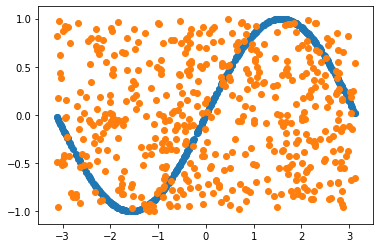

In [14]:
plt.scatter(x, sine)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [15]:
Y = X[:,1] > sine

In [16]:
Y[:10]

array([False, False, False, False,  True, False, False,  True, False,
       False])

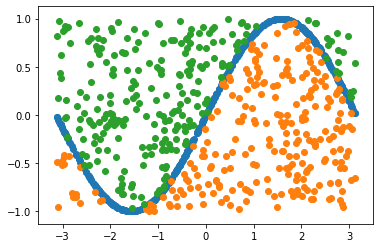

In [17]:
plt.scatter(x, sine)
plt.scatter(X[:,0][Y==0], X[:,1][Y==0])  # Y는 False ==> 0
plt.scatter(X[:,0][Y==1], X[:,1][Y==1])  # Y는 True  ==> 1
plt.show()

In [18]:
model = Sequential()  # 건물

In [19]:
# 1층(사무실10개), 엘리베이터는 relu, 입구에서는 2명씩 들어온다.
model.add(Dense(10, activation='relu', input_shape=(2,)))
model.add(Dense(10, activation='relu')) # 2층(사무실10개), 엘리베이터는 relu
model.add(Dense(10, activation='relu')) # 3층(사무실10개), 엘리베이터는 relu
model.add(Dense(10, activation='relu')) # 4층(사무실10개), 엘리베이터는 relu
model.add(Dense(2, activation='softmax')) # 마지막 5층(사무실2개), 다중분류 softmax

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [22]:
Y[:10]

array([False, False, False, False,  True, False, False,  True, False,
       False])

In [23]:
Y_onehot = np_utils.to_categorical(Y)  # one hot encoding

In [24]:
Y_onehot[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [25]:
model.fit(X, Y_onehot, epochs=200)

Epoch 1/200
500/500 [==============================] - 0s 687us/step - loss: 0.6839
Epoch 2/200
500/500 [==============================] - 0s 40us/step - loss: 0.6822
Epoch 3/200
500/500 [==============================] - 0s 38us/step - loss: 0.6803
Epoch 4/200
500/500 [==============================] - 0s 40us/step - loss: 0.6782
Epoch 5/200
500/500 [==============================] - 0s 38us/step - loss: 0.6760
Epoch 6/200
500/500 [==============================] - 0s 38us/step - loss: 0.6734
Epoch 7/200
500/500 [==============================] - 0s 42us/step - loss: 0.6705
Epoch 8/200
500/500 [==============================] - 0s 42us/step - loss: 0.6673
Epoch 9/200
500/500 [==============================] - 0s 40us/step - loss: 0.6635
Epoch 10/200
500/500 [==============================] - 0s 54us/step - loss: 0.6591
Epoch 11/200
500/500 [==============================] - 0s 40us/step - loss: 0.6535
Epoch 12/200
500/500 [==============================] - 0s 40us/step - loss: 0.6461


500/500 [==============================] - 0s 40us/step - loss: 0.2529
Epoch 99/200
500/500 [==============================] - 0s 44us/step - loss: 0.2510
Epoch 100/200
500/500 [==============================] - 0s 48us/step - loss: 0.2485
Epoch 101/200
500/500 [==============================] - 0s 50us/step - loss: 0.2471
Epoch 102/200
500/500 [==============================] - 0s 40us/step - loss: 0.2451
Epoch 103/200
500/500 [==============================] - 0s 40us/step - loss: 0.2424
Epoch 104/200
500/500 [==============================] - 0s 40us/step - loss: 0.2405
Epoch 105/200
500/500 [==============================] - 0s 40us/step - loss: 0.2394
Epoch 106/200
500/500 [==============================] - 0s 42us/step - loss: 0.2374
Epoch 107/200
500/500 [==============================] - 0s 40us/step - loss: 0.2364
Epoch 108/200
500/500 [==============================] - 0s 42us/step - loss: 0.2326
Epoch 109/200
500/500 [==============================] - 0s 40us/step - loss: 0.

500/500 [==============================] - 0s 44us/step - loss: 0.0884
Epoch 195/200
500/500 [==============================] - 0s 52us/step - loss: 0.0949
Epoch 196/200
500/500 [==============================] - 0s 44us/step - loss: 0.0832
Epoch 197/200
500/500 [==============================] - 0s 42us/step - loss: 0.0803
Epoch 198/200
500/500 [==============================] - 0s 40us/step - loss: 0.0854
Epoch 199/200
500/500 [==============================] - 0s 40us/step - loss: 0.0772
Epoch 200/200
500/500 [==============================] - 0s 42us/step - loss: 0.0853


In [26]:
print("test loss: {:.2f}".format(model.evaluate(X, Y_onehot)))

500/500 [==============================] - 0s 100us/step
test loss: 0.07


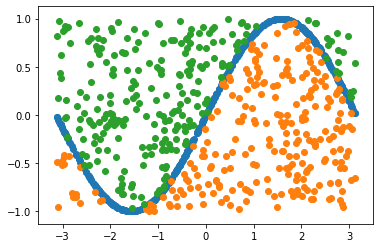

In [27]:
plt.scatter(x, sine)
plt.scatter(X[:,0][Y==0], X[:,1][Y==0])  # Y는 False ==> 0
plt.scatter(X[:,0][Y==1], X[:,1][Y==1])  # Y는 True  ==> 1
plt.show()

In [28]:
a = [-2, 0]  # 초록색 점, Y_onehot [ 0, 1 ]
b = [2, 0]   # 오렌지색 점, Y_onehot [ 1, 0 ]
pred_x = np.vstack( (a,b) )
pred_x

array([[-2,  0],
       [ 2,  0]])

In [29]:
pred = model.predict(pred_x)

In [30]:
pred
# array([[0.09219968, 0.9078003 ], ==> 오렌지색(orange):9.2%, 초록색(grren):90.7%
#        [0.99249446, 0.00750557]], dtype=float32) ==> 오렌지색(orange):99.2%, 초록색(grren):0.7% 
# 초록색 True ==> Y_onehot [0, 1]
# 오렌지색 False ==> Y_onehot [1, 0]
# [ 오렌지(orange)색일_확율, 초록색(green)일_확율 ]
# 예) 3가지인 경우 : [강아지, 고양이, 돼지]

array([[0.00261529, 0.9973847 ],
       [0.99744   , 0.00255996]], dtype=float32)

In [31]:
# 수입이 50k 보다 많은지 적은지를 분류하는 실습

In [32]:
import pandas as pd
import seaborn as sns

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler

In [34]:
# https://archive.ics.uci.edu/ml/datasets/Adult

In [35]:
# Attribute Information:

# Listing of attributes:

# >50K, <=50K.

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [36]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', '5k']

In [37]:
df = pd.read_csv('datasets/adult.data', index_col=False, names=names)

In [38]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,5k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.shape

(32561, 15)

In [40]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
5k                32561
dtype: int64

In [42]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
5k                False
dtype: bool

In [43]:
df['5k'].value_counts()

 <=50K    24720
 >50K      7841
Name: 5k, dtype: int64

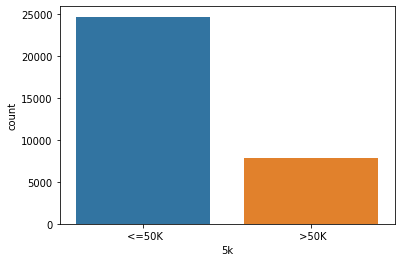

In [44]:
sns.countplot('5k', data=df)

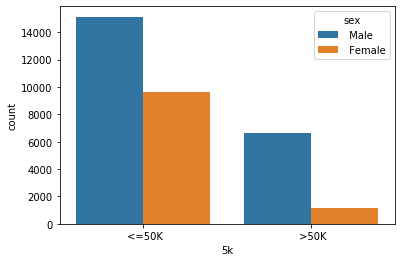

In [45]:
sns.countplot('5k', hue='sex', data=df)

In [46]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


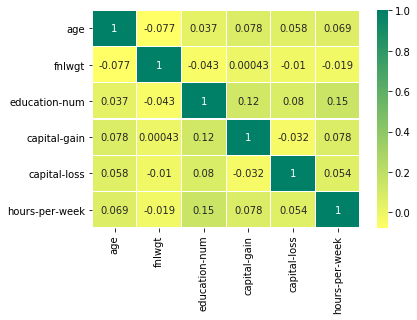

In [47]:
sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidths=0.2)

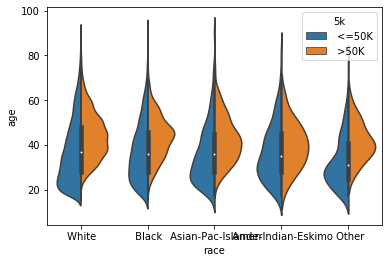

In [48]:
sns.violinplot('race', 'age', hue='5k', data=df, split=True)

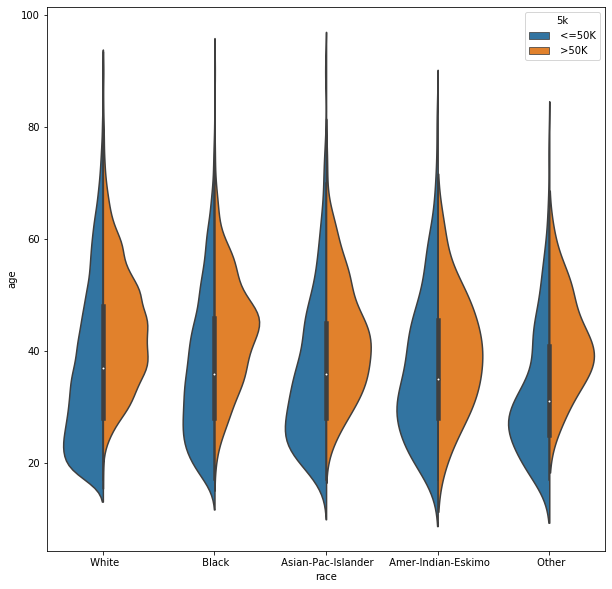

In [49]:
plt.figure(figsize=(10,10))
sns.violinplot('race', 'age', hue='5k', data=df, split=True)

In [50]:
df['5k'].values[:10]

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' >50K', ' >50K'], dtype=object)

In [51]:
Y = df['5k'].values.tolist()

In [52]:
Y = [ 1 if i == ' <=50K' else 0 for i in Y ]  # ' <=50K'는 1, 아니면 0

In [53]:
Y[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [54]:
Y = np_utils.to_categorical(Y)  # one hot encoding

In [55]:
Y[:10]  # 1 ==> [0,1], 0 ==> [1,0]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [56]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,5k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  5k              32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [58]:
nums = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [59]:
X = df.drop(nums, axis=1)  # nums 빼고 문자 데이터만 얻기

In [60]:
X.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,5k
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [61]:
X = X.drop('5k', axis=1)

In [62]:
X.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [63]:
# pd.get_dummies(X)

In [64]:
X = pd.get_dummies(X, drop_first=True)  # one hot encoding

In [65]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X = pd.concat( [X, df[nums] ], axis=1 )

In [67]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [68]:
scaler = MinMaxScaler()

In [69]:
X[nums] = scaler.fit_transform(X[nums])

In [70]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [71]:
X.shape

(32561, 100)

In [72]:
X_train = X[:-1000]
X_test = X[-1000:]

In [73]:
X_train.shape, X_test.shape

((31561, 100), (1000, 100))

In [74]:
Y_train = Y[:-1000]
Y_test = Y[-1000:]

In [75]:
Y_train.shape, Y_test.shape

((31561, 2), (1000, 2))

In [76]:
X_test.iloc[:,:]

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
31561,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.547945,0.272401,1.000000,0.000000,0.436639,0.397959
31562,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.315068,0.124790,0.533333,0.000000,0.000000,0.448980
31563,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.260274,0.064531,0.533333,0.000000,0.000000,0.500000
31564,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.383562,0.094390,0.800000,0.000000,0.000000,0.397959
31565,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.479452,0.166105,0.800000,0.000000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.136986,0.166404,0.733333,0.000000,0.000000,0.377551
32557,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.315068,0.096500,0.533333,0.000000,0.000000,0.397959
32558,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.561644,0.094827,0.533333,0.000000,0.000000,0.397959
32559,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.068493,0.128499,0.533333,0.000000,0.000000,0.193878


In [77]:
Y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [78]:
model = Sequential()

In [79]:
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
hist = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Train on 25248 samples, validate on 6313 samples
Epoch 1/10
25248/25248 [==============================] - 14s 559us/step - loss: 0.3573 - acc: 0.8320 - val_loss: 0.3518 - val_acc: 0.8316
Epoch 2/10
25248/25248 [==============================] - 14s 550us/step - loss: 0.3293 - acc: 0.8466 - val_loss: 0.3240 - val_acc: 0.8498
Epoch 3/10
25248/25248 [==============================] - 14s 545us/step - loss: 0.3173 - acc: 0.8529 - val_loss: 0.3253 - val_acc: 0.8509
Epoch 4/10
25248/25248 [==============================] - 14s 546us/step - loss: 0.3102 - acc: 0.8577 - val_loss: 0.3326 - val_acc: 0.8437
Epoch 5/10
25248/25248 [==============================] - 14s 566us/step - loss: 0.3057 - acc: 0.8584 - val_loss: 0.3271 - val_acc: 0.8479
Epoch 6/10
25248/25248 [==============================] - 14s 547us/step - loss: 0.2979 - acc: 0.8619 - val_loss: 0.3197 - val_acc: 0.8490
Epoch 7/10
25248/25248 [==============================] - 14s 549us/step - loss: 0.2908 - acc: 0.8620 - val_loss: 0.3

In [82]:
hist.history

{'val_loss': [0.35180259886264575,
  0.3239813227765292,
  0.3252830356855164,
  0.3326151251967577,
  0.32709982179007324,
  0.31966127295908,
  0.33086171252223706,
  0.33910273333680097,
  0.36066261770399327,
  0.3547966113214011],
 'val_acc': [0.8316172976586741,
  0.8498336765593552,
  0.8509424996228749,
  0.8436559480531609,
  0.8479328370218928,
  0.8490416600854125,
  0.8490416600854125,
  0.851892919391606,
  0.8515761127925875,
  0.8511009029176635],
 'loss': [0.35733962166671973,
  0.32932870756688376,
  0.31726511580107025,
  0.3101805876869666,
  0.30568333368639833,
  0.29788709314792633,
  0.2908236140194048,
  0.2843031877951628,
  0.27785734691585123,
  0.2731948738447916],
 'acc': [0.832026299112801,
  0.8466413181242078,
  0.8528992395437263,
  0.8576916983523447,
  0.8583650190114068,
  0.8619296577946768,
  0.8620088719898605,
  0.8657319391634981,
  0.8690589353612167,
  0.8713561470215463]}

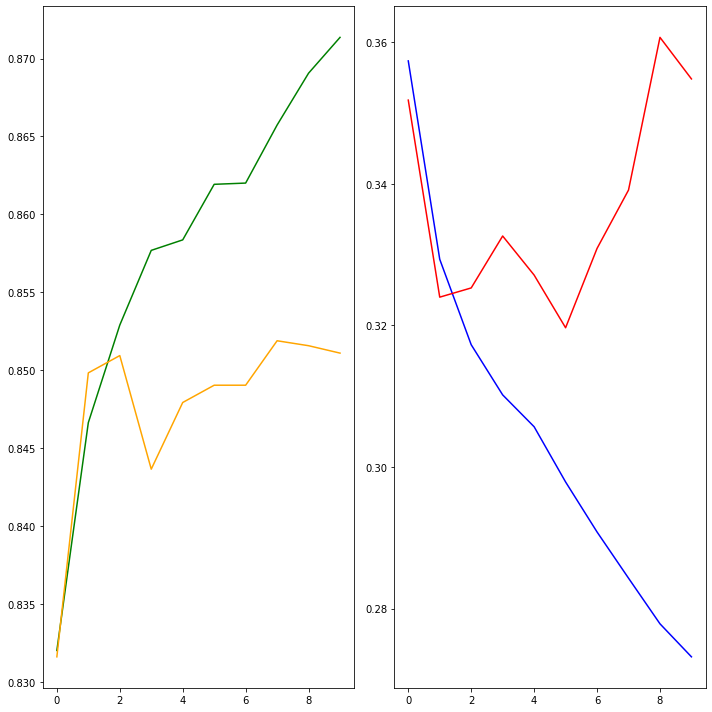

In [83]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(hist.history['acc'], color='green')
plt.plot(hist.history['val_acc'], color='orange')
plt.subplot(122)
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')
plt.tight_layout()
plt.show()

In [84]:
model.evaluate(X_test, Y_test)
# [0.38387712597846985, 0.829]
# [loss, acc]
# 비용 : 0.38387712597846985
# 정확도 : 0.829 ==> 82.9%

1000/1000 [==============================] - 0s 89us/step


[0.3759037396907806, 0.833]

In [85]:
pred = model.predict(X_test)

In [86]:
pred[:10]
# 1 ==> [0,1], 0 ==> [1,0]
# [ '>5K', ' <=50K' ]
# [ 0일확율, 1일확율 ]

array([[9.81938124e-01, 1.80619135e-02],
       [1.06163114e-01, 8.93836856e-01],
       [4.97814000e-01, 5.02186060e-01],
       [1.15862070e-02, 9.88413870e-01],
       [8.37339520e-01, 1.62660509e-01],
       [8.41450132e-03, 9.91585493e-01],
       [2.79311440e-03, 9.97206867e-01],
       [7.01270153e-08, 9.99999881e-01],
       [5.67952096e-01, 4.32047844e-01],
       [3.07509513e-03, 9.96924937e-01]], dtype=float32)

In [87]:
Y_test[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [88]:
# iris 분류

In [89]:
# https://archive.ics.uci.edu/ml/datasets/Iris

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [91]:
names = ['sl', 'sw', 'pl', 'pw', 'class']

In [92]:
df = pd.read_csv('datasets/iris.data', names=names)

In [93]:
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
Y_encoded = LabelEncoder().fit_transform(df['class'])

In [96]:
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
Y = np_utils.to_categorical(Y_encoded)

In [98]:
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [99]:
X = df.drop('class', axis=1)

In [100]:
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=0)

In [103]:
model = Sequential()

In [104]:
model.add(Dense(256, activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 1s 4ms/step - loss: 1.1533 - acc: 0.3719 - val_loss: 0.9651 - val_acc: 0.6429
Epoch 2/50
121/121 [==============================] - 0s 107us/step - loss: 0.9020 - acc: 0.6942 - val_loss: 0.8580 - val_acc: 0.6429
Epoch 3/50
121/121 [==============================] - 0s 91us/step - loss: 0.7551 - acc: 0.6942 - val_loss: 0.6615 - val_acc: 0.6429
Epoch 4/50
121/121 [==============================] - 0s 99us/step - loss: 0.6170 - acc: 0.7025 - val_loss: 0.5577 - val_acc: 0.6429
Epoch 5/50
121/121 [==============================] - 0s 99us/step - loss: 0.5377 - acc: 0.7273 - val_loss: 0.4979 - val_acc: 0.6429
Epoch 6/50
121/121 [==============================] - 0s 99us/step - loss: 0.4700 - acc: 0.7355 - val_loss: 0.4332 - val_acc: 0.8571
Epoch 7/50
121/121 [==============================] - 0s 99us/step - loss: 0.4293 - acc: 0.9174 - val_loss: 0.3891 - val_acc: 0.9286
Epoch 8/50
121/121 [====

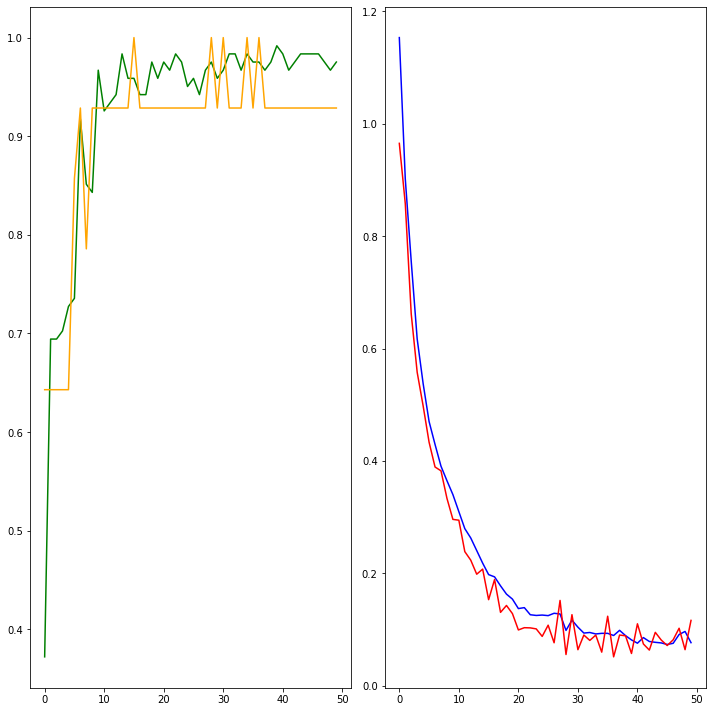

In [107]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(hist.history['acc'], color='green')
plt.plot(hist.history['val_acc'], color='orange')
plt.subplot(122)
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')
plt.tight_layout()
plt.show()

In [108]:
loss_score = model.evaluate(X_test, y_test)
print("test loss: {:.2f}".format(loss_score[0]))
print("test acc: {:.2f}".format(loss_score[1]))

15/15 [==============================] - 0s 133us/step
test loss: 0.02
test acc: 1.00


In [109]:
pred = model.predict(X_test)

In [110]:
pred[:5]

array([[2.25870433e-08, 7.06413703e-04, 9.99293566e-01],
       [6.49509311e-04, 9.96396959e-01, 2.95361038e-03],
       [9.99929309e-01, 7.06966166e-05, 1.02992524e-10],
       [1.00042747e-08, 3.25577776e-03, 9.96744156e-01],
       [9.99518633e-01, 4.81386262e-04, 3.71896869e-09]], dtype=float32)

In [111]:
y_test[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [112]:
# 요약
# 1. model = Sequectial()
# 2. model.add(Dense(x, activation='relu', ..))
# 3. model.compile(loss="...", optimizer="adam", metrics=['accuracy'])  # 모델 설계
# 4. model.fit(X_train, y_train, ...)  # train
# 5. model.evaluate(X_test, y_test)    # test
# 6. model.predict(X_new)              # 예측

In [113]:
# https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [115]:
df = pd.read_excel('datasets/Concrete_Data.xls')

In [116]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [117]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [118]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [119]:
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':"cement",
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"blast",
    'Fly Ash (component 3)(kg in a m^3 mixture)':"ply",
    'Water  (component 4)(kg in a m^3 mixture)':"water",
    'Superplasticizer (component 5)(kg in a m^3 mixture)':"super",
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse",
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine",
    'Age (day)':"age",
    'Concrete compressive strength(MPa, megapascals) ':"strength"
})

In [120]:
df

,cement,blast,ply,water,super,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [121]:
X = df.drop(['strength'], axis=1)

In [122]:
X

,cement,blast,ply,water,super,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [123]:
Y = df['strength']

In [124]:
Y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

In [125]:
scaler = MinMaxScaler()

In [126]:
X = scaler.fit_transform(X)

In [127]:
X

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

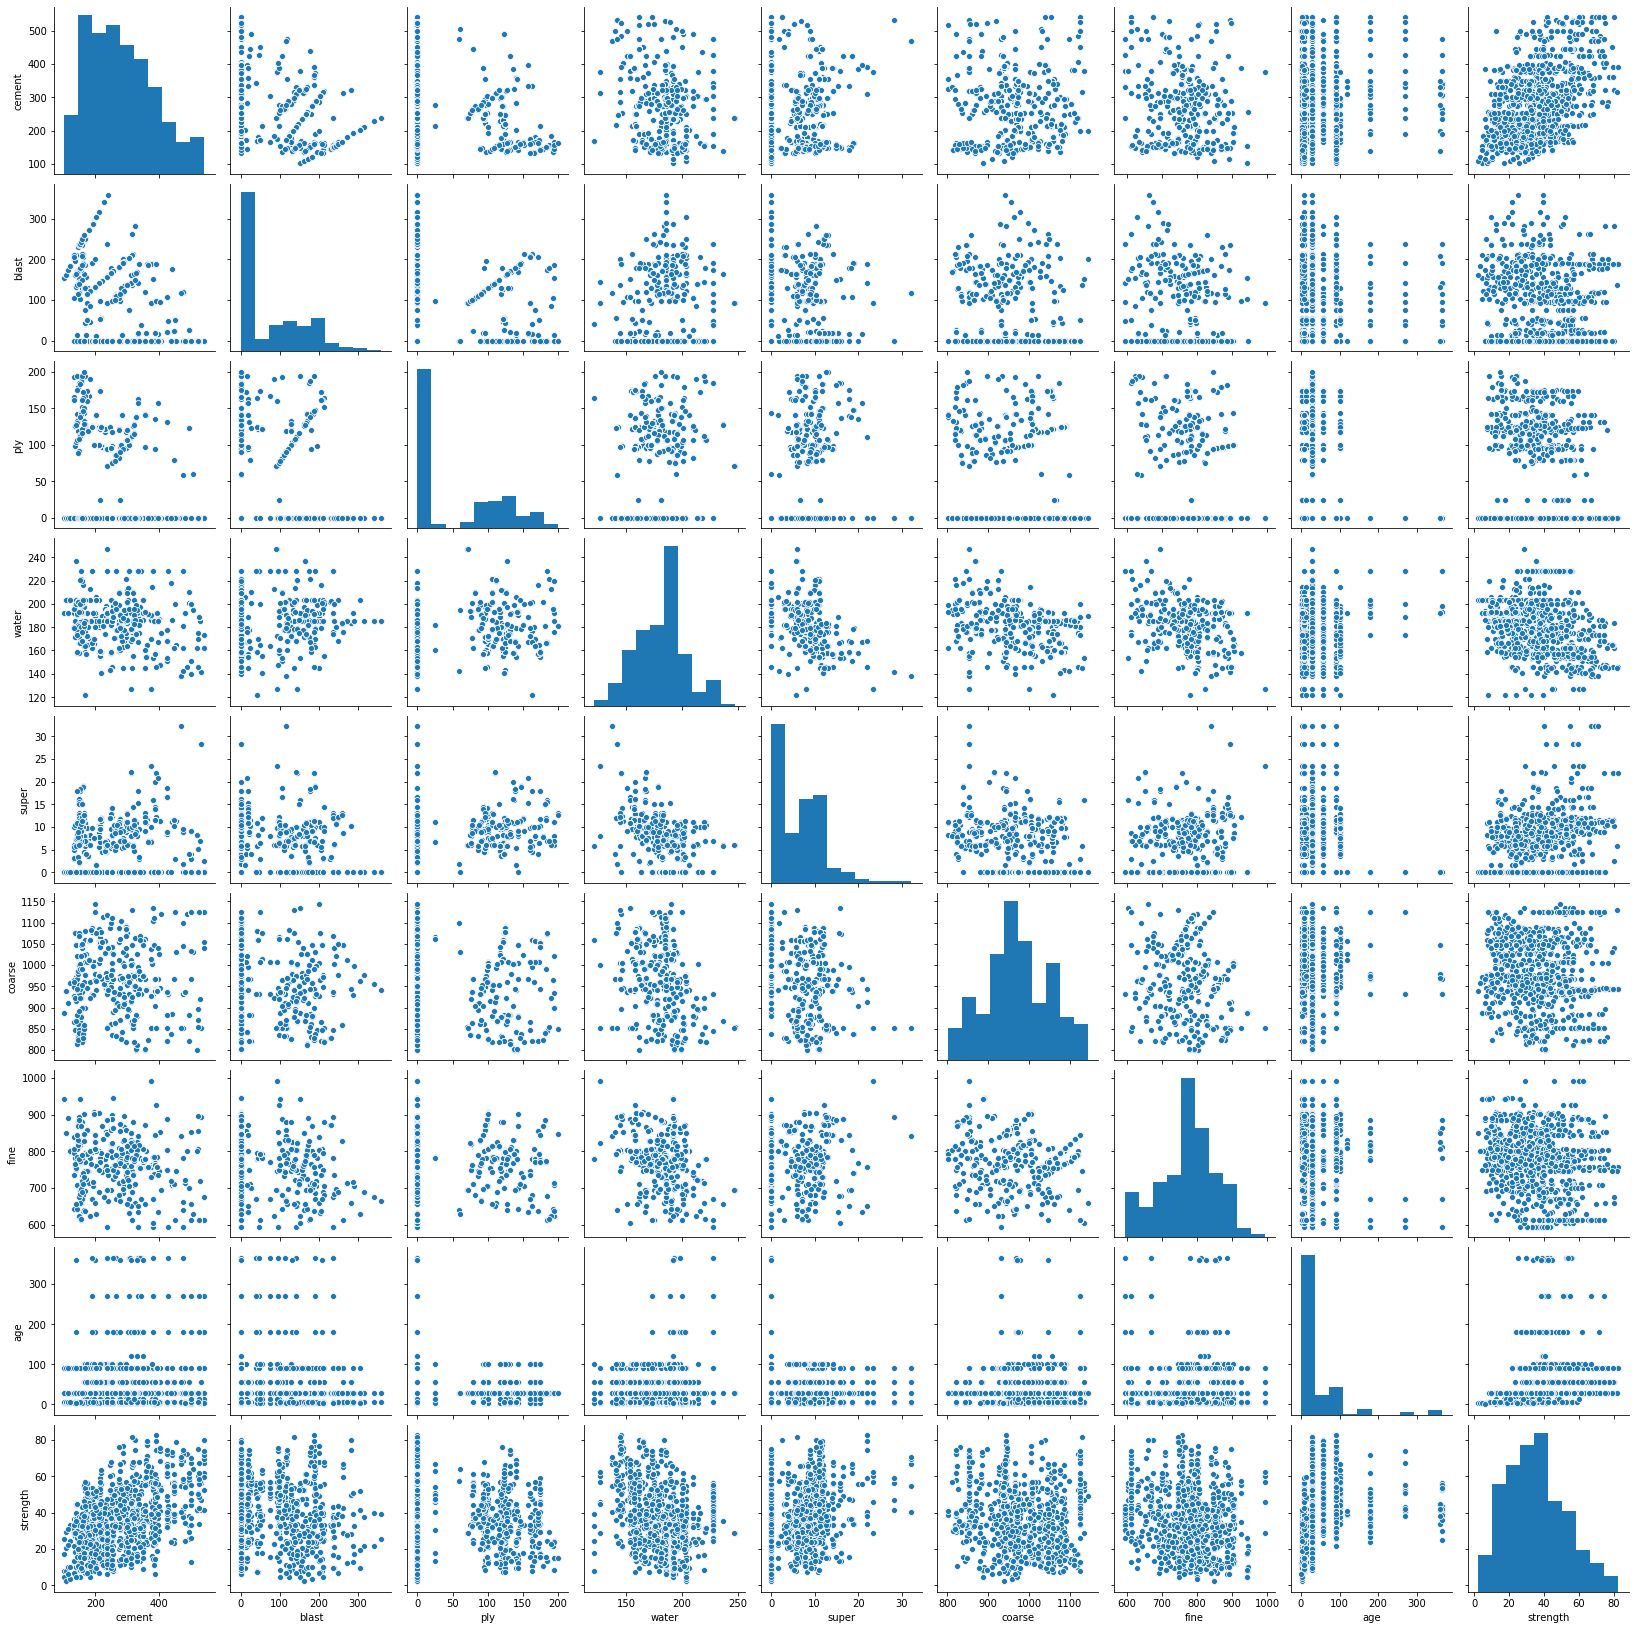

In [128]:
sns.pairplot(df)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [130]:
X_train.shape, X_test.shape

((927, 8), (103, 8))

In [131]:
model = Sequential()

In [132]:
model.add(Dense(256, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [133]:
model.compile(loss='mse', optimizer='adam')

In [134]:
hist = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1)

Train on 834 samples, validate on 93 samples
Epoch 1/500
834/834 [==============================] - 1s 832us/step - loss: 843.7467 - val_loss: 212.1082
Epoch 2/500
834/834 [==============================] - 0s 195us/step - loss: 194.5633 - val_loss: 152.8385
Epoch 3/500
834/834 [==============================] - 0s 189us/step - loss: 144.1795 - val_loss: 124.4246
Epoch 4/500
834/834 [==============================] - 0s 199us/step - loss: 121.6343 - val_loss: 119.9559
Epoch 5/500
834/834 [==============================] - 0s 187us/step - loss: 116.8676 - val_loss: 121.2203
Epoch 6/500
834/834 [==============================] - 0s 187us/step - loss: 112.8723 - val_loss: 107.9926
Epoch 7/500
834/834 [==============================] - 0s 236us/step - loss: 105.0433 - val_loss: 104.9485
Epoch 8/500
834/834 [==============================] - 0s 203us/step - loss: 101.3501 - val_loss: 96.0042
Epoch 9/500
834/834 [==============================] - 0s 195us/step - loss: 97.2687 - val_loss: 90.

Epoch 78/500
834/834 [==============================] - 0s 191us/step - loss: 25.8674 - val_loss: 23.6801
Epoch 79/500
834/834 [==============================] - 0s 187us/step - loss: 25.2403 - val_loss: 24.4341
Epoch 80/500
834/834 [==============================] - 0s 187us/step - loss: 25.8013 - val_loss: 25.9823
Epoch 81/500
834/834 [==============================] - 0s 202us/step - loss: 25.0252 - val_loss: 28.2311
Epoch 82/500
834/834 [==============================] - 0s 217us/step - loss: 26.2173 - val_loss: 22.2540
Epoch 83/500
834/834 [==============================] - 0s 172us/step - loss: 25.1075 - val_loss: 26.4388
Epoch 84/500
834/834 [==============================] - 0s 169us/step - loss: 24.2232 - val_loss: 25.7271
Epoch 85/500
834/834 [==============================] - 0s 207us/step - loss: 24.0229 - val_loss: 24.1380
Epoch 86/500
834/834 [==============================] - 0s 192us/step - loss: 23.5117 - val_loss: 23.2722
Epoch 87/500
834/834 [========================

Epoch 155/500
834/834 [==============================] - 0s 204us/step - loss: 16.0104 - val_loss: 25.4386
Epoch 156/500
834/834 [==============================] - 0s 187us/step - loss: 18.6466 - val_loss: 24.6102
Epoch 157/500
834/834 [==============================] - 0s 193us/step - loss: 14.8720 - val_loss: 22.1605
Epoch 158/500
834/834 [==============================] - 0s 190us/step - loss: 14.5642 - val_loss: 20.7360
Epoch 159/500
834/834 [==============================] - 0s 210us/step - loss: 15.7422 - val_loss: 21.6246
Epoch 160/500
834/834 [==============================] - 0s 192us/step - loss: 16.1252 - val_loss: 22.7705
Epoch 161/500
834/834 [==============================] - 0s 188us/step - loss: 15.3548 - val_loss: 19.9245
Epoch 162/500
834/834 [==============================] - 0s 192us/step - loss: 15.0727 - val_loss: 20.0692
Epoch 163/500
834/834 [==============================] - 0s 189us/step - loss: 14.4156 - val_loss: 21.5884
Epoch 164/500
834/834 [==============

834/834 [==============================] - ETA: 0s - loss: 11.22 - 0s 199us/step - loss: 11.2421 - val_loss: 22.6115
Epoch 232/500
834/834 [==============================] - 0s 189us/step - loss: 11.9221 - val_loss: 21.7718
Epoch 233/500
834/834 [==============================] - 0s 212us/step - loss: 12.0535 - val_loss: 22.2359
Epoch 234/500
834/834 [==============================] - 0s 187us/step - loss: 11.7106 - val_loss: 21.7219
Epoch 235/500
834/834 [==============================] - 0s 209us/step - loss: 12.7029 - val_loss: 22.6571
Epoch 236/500
834/834 [==============================] - 0s 192us/step - loss: 13.1876 - val_loss: 19.8863
Epoch 237/500
834/834 [==============================] - 0s 192us/step - loss: 12.7736 - val_loss: 19.8862
Epoch 238/500
834/834 [==============================] - 0s 225us/step - loss: 12.1899 - val_loss: 20.5787
Epoch 239/500
834/834 [==============================] - 0s 205us/step - loss: 12.1340 - val_loss: 20.6721
Epoch 240/500
834/834 [====

834/834 [==============================] - 0s 217us/step - loss: 9.2554 - val_loss: 21.1584
Epoch 308/500
834/834 [==============================] - 0s 224us/step - loss: 9.6859 - val_loss: 19.1117
Epoch 309/500
834/834 [==============================] - 0s 247us/step - loss: 9.2156 - val_loss: 20.0392
Epoch 310/500
834/834 [==============================] - 0s 216us/step - loss: 9.1209 - val_loss: 20.1315
Epoch 311/500
834/834 [==============================] - 0s 206us/step - loss: 9.3952 - val_loss: 23.7643
Epoch 312/500
834/834 [==============================] - 0s 225us/step - loss: 9.5631 - val_loss: 18.3331
Epoch 313/500
834/834 [==============================] - 0s 225us/step - loss: 10.4613 - val_loss: 19.3745
Epoch 314/500
834/834 [==============================] - 0s 225us/step - loss: 8.8586 - val_loss: 22.3058
Epoch 315/500
834/834 [==============================] - 0s 221us/step - loss: 10.0480 - val_loss: 24.7952
Epoch 316/500
834/834 [==============================] - 0

834/834 [==============================] - 0s 187us/step - loss: 8.5622 - val_loss: 18.8277
Epoch 385/500
834/834 [==============================] - 0s 187us/step - loss: 7.9905 - val_loss: 17.9776
Epoch 386/500
834/834 [==============================] - 0s 187us/step - loss: 8.3720 - val_loss: 19.9191
Epoch 387/500
834/834 [==============================] - 0s 187us/step - loss: 8.3267 - val_loss: 19.5736
Epoch 388/500
834/834 [==============================] - 0s 187us/step - loss: 8.7936 - val_loss: 20.8356
Epoch 389/500
834/834 [==============================] - 0s 187us/step - loss: 8.0731 - val_loss: 19.6366
Epoch 390/500
834/834 [==============================] - 0s 187us/step - loss: 8.0532 - val_loss: 18.5600
Epoch 391/500
834/834 [==============================] - 0s 187us/step - loss: 7.8738 - val_loss: 20.2196
Epoch 392/500
834/834 [==============================] - 0s 206us/step - loss: 7.5944 - val_loss: 18.1768
Epoch 393/500
834/834 [==============================] - 0s 

834/834 [==============================] - 0s 206us/step - loss: 6.6264 - val_loss: 17.1075
Epoch 462/500
834/834 [==============================] - 0s 187us/step - loss: 6.3540 - val_loss: 15.3459
Epoch 463/500
834/834 [==============================] - 0s 187us/step - loss: 7.2355 - val_loss: 17.0407
Epoch 464/500
834/834 [==============================] - 0s 187us/step - loss: 6.9697 - val_loss: 17.8657
Epoch 465/500
834/834 [==============================] - 0s 187us/step - loss: 6.9025 - val_loss: 18.8724
Epoch 466/500
834/834 [==============================] - 0s 169us/step - loss: 6.4242 - val_loss: 16.7765
Epoch 467/500
834/834 [==============================] - 0s 187us/step - loss: 6.4230 - val_loss: 16.5400
Epoch 468/500
834/834 [==============================] - 0s 169us/step - loss: 6.7596 - val_loss: 18.9332
Epoch 469/500
834/834 [==============================] - 0s 187us/step - loss: 7.2602 - val_loss: 17.2671
Epoch 470/500
834/834 [==============================] - 0s 

In [135]:
loss_score = model.evaluate(X_test, y_test)
loss_score

103/103 [==============================] - 0s 0us/step


28.822924326924444

In [136]:
pred = model.predict(X_test[-5:])

In [137]:
pred

array([[61.616257],
       [42.14002 ],
       [37.229794],
       [70.08406 ],
       [49.173122]], dtype=float32)

In [138]:
y_test[-5:]

150    66.100064
559    39.435269
761    31.350474
130    74.697830
331    52.503597
Name: strength, dtype: float64

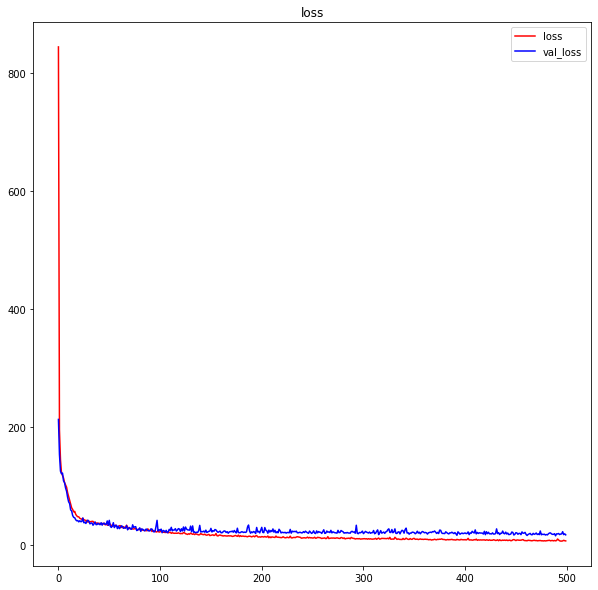

In [139]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [140]:
# 손글씨 숫자 분류 문제

In [141]:
import keras
mnist = keras.datasets.mnist

In [142]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 처음 실행 시 다운로드 한 후 메모리에 올려준다.
# Downloading data from https://s3.amazonaws.com/img-datasets/mnist.npz
# 11493376/11490434 [==============================] - 6s 1us/step

In [143]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [144]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [145]:
y_train[0]  # 5

5

In [146]:
type(y_train)

numpy.ndarray

In [147]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [148]:
np.set_printoptions(linewidth=1000)  # default=75

In [149]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

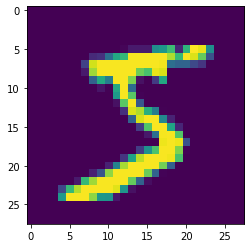

In [150]:
plt.imshow(x_train[0])

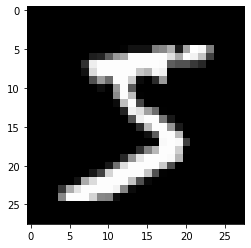

In [151]:
plt.imshow(x_train[0], cmap='gray')

In [152]:
x_train = x_train / 255.0

In [153]:
x_test = x_test / 255.0

In [154]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [155]:
from keras.models import Sequential

In [156]:
from keras.layers import Flatten

In [157]:
from keras.layers import Dropout

In [158]:
from keras.layers import Dense

In [159]:
model = Sequential()

In [160]:
model.add(Flatten(input_shape=(28,28)))  # 28 * 28 ==> 784
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # 20%
model.add(Dense(10, activation='softmax'))  # 다중분류 0 ~ 9 : 10가지

In [161]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [162]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2993 - acc: 0.9129
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.1429 - acc: 0.9564
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.1080 - acc: 0.9673
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0858 - acc: 0.9730
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0753 - acc: 0.9765


In [163]:
model.evaluate(x_test, y_test)
# [0.07137227377258241, 0.9784]
# [ loss, accuracy ], 비용 : 0.07137227377258241, 정확도 : 97.84%

10000/10000 [==============================] - 0s 42us/step


[0.07683054335005582, 0.9765]

In [164]:
# 혈중 지방 함량치 예측

In [165]:
raw_data = np.genfromtxt('datasets/blood_fat.csv', delimiter=",", skip_header=1)

In [166]:
raw_data
# Index, One, Weight, Age, BloodFat

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

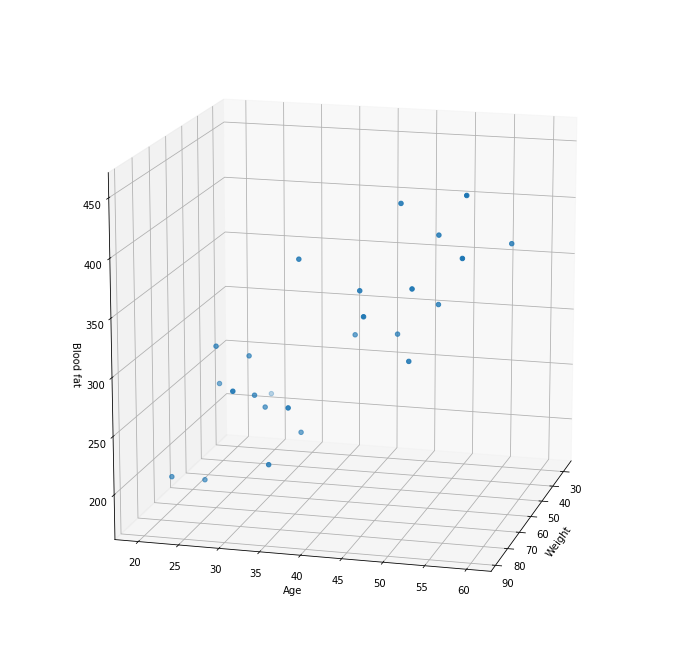

In [167]:
from mpl_toolkits.mplot3d import Axes3D
# Index, One, Weight, Age, BloodFat
xs = np.array(raw_data[:,2], dtype=np.float32)  # Weight
ys = np.array(raw_data[:,3], dtype=np.float32)  # Age
zs = np.array(raw_data[:,4], dtype=np.float32)  # BloodFat

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)

plt.show()

In [168]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)  # 2,3 ==> Weight, Age
y_data = np.array(raw_data[:,4], dtype=np.float32)    # 4 ==> BloodFat
y_data

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209., 290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181., 274., 303., 244.], dtype=float32)

In [169]:
y_data = y_data.reshape((-1,1))

In [170]:
y_data

array([[354.],
       [190.],
       [405.],
       [263.],
       [451.],
       [302.],
       [288.],
       [385.],
       [402.],
       [365.],
       [209.],
       [290.],
       [346.],
       [254.],
       [395.],
       [434.],
       [220.],
       [374.],
       [308.],
       [220.],
       [311.],
       [181.],
       [274.],
       [303.],
       [244.]], dtype=float32)

In [171]:
from keras.optimizers import RMSprop

In [172]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=RMSprop(lr=0.01))

In [173]:
hist = model.fit(x_data, y_data, epochs=2000)

Epoch 1/2000
25/25 [==============================] - 0s 12ms/step - loss: 65160.9414
Epoch 2/2000
25/25 [==============================] - 0s 0us/step - loss: 63438.0195
Epoch 3/2000
25/25 [==============================] - 0s 610us/step - loss: 62211.6484
Epoch 4/2000
25/25 [==============================] - 0s 80us/step - loss: 61198.6758
Epoch 5/2000
25/25 [==============================] - 0s 80us/step - loss: 60309.5859
Epoch 6/2000
25/25 [==============================] - 0s 120us/step - loss: 59502.9336
Epoch 7/2000
25/25 [==============================] - 0s 80us/step - loss: 58755.6836
Epoch 8/2000
25/25 [==============================] - 0s 80us/step - loss: 58053.5117
Epoch 9/2000
25/25 [==============================] - 0s 80us/step - loss: 57386.8281
Epoch 10/2000
25/25 [==============================] - 0s 40us/step - loss: 56748.9102
Epoch 11/2000
25/25 [==============================] - 0s 80us/step - loss: 56134.7852
Epoch 12/2000
25/25 [==============================

Epoch 96/2000
25/25 [==============================] - 0s 40us/step - loss: 22595.0332
Epoch 97/2000
25/25 [==============================] - 0s 0us/step - loss: 22310.7559
Epoch 98/2000
25/25 [==============================] - 0s 80us/step - loss: 22028.7422
Epoch 99/2000
25/25 [==============================] - 0s 50us/step - loss: 21749.0000
Epoch 100/2000
25/25 [==============================] - 0s 80us/step - loss: 21471.5176
Epoch 101/2000
25/25 [==============================] - 0s 10us/step - loss: 21196.3047
Epoch 102/2000
25/25 [==============================] - 0s 51us/step - loss: 20923.3555
Epoch 103/2000
25/25 [==============================] - 0s 55us/step - loss: 20652.6582
Epoch 104/2000
25/25 [==============================] - 0s 40us/step - loss: 20384.2285
Epoch 105/2000
25/25 [==============================] - 0s 48us/step - loss: 20118.0547
Epoch 106/2000
25/25 [==============================] - 0s 40us/step - loss: 19854.1367
Epoch 107/2000
25/25 [===============

Epoch 190/2000
25/25 [==============================] - 0s 80us/step - loss: 5518.9736
Epoch 191/2000
25/25 [==============================] - 0s 80us/step - loss: 5437.3970
Epoch 192/2000
25/25 [==============================] - 0s 80us/step - loss: 5357.7563
Epoch 193/2000
25/25 [==============================] - 0s 80us/step - loss: 5280.0420
Epoch 194/2000
25/25 [==============================] - 0s 80us/step - loss: 5204.2441
Epoch 195/2000
25/25 [==============================] - 0s 80us/step - loss: 5130.3521
Epoch 196/2000
25/25 [==============================] - 0s 40us/step - loss: 5058.3564
Epoch 197/2000
25/25 [==============================] - 0s 40us/step - loss: 4988.2461
Epoch 198/2000
25/25 [==============================] - 0s 80us/step - loss: 4920.0117
Epoch 199/2000
25/25 [==============================] - 0s 80us/step - loss: 4853.6377
Epoch 200/2000
25/25 [==============================] - 0s 80us/step - loss: 4789.1138
Epoch 201/2000
25/25 [=====================

Epoch 285/2000
25/25 [==============================] - 0s 53us/step - loss: 3146.3135
Epoch 286/2000
25/25 [==============================] - 0s 52us/step - loss: 3137.5569
Epoch 287/2000
25/25 [==============================] - 0s 0us/step - loss: 3128.8193
Epoch 288/2000
25/25 [==============================] - 0s 93us/step - loss: 3120.1025
Epoch 289/2000
25/25 [==============================] - 0s 110us/step - loss: 3111.4077
Epoch 290/2000
25/25 [==============================] - 0s 82us/step - loss: 3102.7375
Epoch 291/2000
25/25 [==============================] - 0s 61us/step - loss: 3094.0938
Epoch 292/2000
25/25 [==============================] - 0s 64us/step - loss: 3085.4768
Epoch 293/2000
25/25 [==============================] - 0s 53us/step - loss: 3076.8872
Epoch 294/2000
25/25 [==============================] - 0s 102us/step - loss: 3068.3281
Epoch 295/2000
25/25 [==============================] - 0s 80us/step - loss: 3059.7979
Epoch 296/2000
25/25 [====================

Epoch 380/2000
25/25 [==============================] - 0s 0us/step - loss: 2455.3677
Epoch 381/2000
25/25 [==============================] - 0s 40us/step - loss: 2449.5896
Epoch 382/2000
25/25 [==============================] - 0s 90us/step - loss: 2443.8340
Epoch 383/2000
25/25 [==============================] - 0s 10us/step - loss: 2438.1123
Epoch 384/2000
25/25 [==============================] - 0s 92us/step - loss: 2432.4153
Epoch 385/2000
25/25 [==============================] - 0s 40us/step - loss: 2426.7654
Epoch 386/2000
25/25 [==============================] - 0s 51us/step - loss: 2421.1414
Epoch 387/2000
25/25 [==============================] - 0s 40us/step - loss: 2415.5964
Epoch 388/2000
25/25 [==============================] - 0s 84us/step - loss: 2410.0540
Epoch 389/2000
25/25 [==============================] - 0s 0us/step - loss: 2404.6082
Epoch 390/2000
25/25 [==============================] - 0s 148us/step - loss: 2399.0693
Epoch 391/2000
25/25 [======================

Epoch 475/2000
25/25 [==============================] - 0s 50us/step - loss: 2037.4606
Epoch 476/2000
25/25 [==============================] - 0s 40us/step - loss: 2034.4279
Epoch 477/2000
25/25 [==============================] - 0s 0us/step - loss: 2031.4539
Epoch 478/2000
25/25 [==============================] - 0s 60us/step - loss: 2028.4775
Epoch 479/2000
25/25 [==============================] - 0s 40us/step - loss: 2025.5598
Epoch 480/2000
25/25 [==============================] - 0s 40us/step - loss: 2022.6405
Epoch 481/2000
25/25 [==============================] - 0s 91us/step - loss: 2019.7784
Epoch 482/2000
25/25 [==============================] - 0s 76us/step - loss: 2016.9164
Epoch 483/2000
25/25 [==============================] - 0s 50us/step - loss: 2014.1112
Epoch 484/2000
25/25 [==============================] - 0s 121us/step - loss: 2011.3053
Epoch 485/2000
25/25 [==============================] - 0s 109us/step - loss: 2008.5575
Epoch 486/2000
25/25 [====================

Epoch 570/2000
25/25 [==============================] - 0s 294us/step - loss: 1871.6378
Epoch 571/2000
25/25 [==============================] - 0s 31us/step - loss: 1871.0955
Epoch 572/2000
25/25 [==============================] - 0s 151us/step - loss: 1870.5468
Epoch 573/2000
25/25 [==============================] - 0s 46us/step - loss: 1870.0444
Epoch 574/2000
25/25 [==============================] - 0s 131us/step - loss: 1869.5355
Epoch 575/2000
25/25 [==============================] - 0s 40us/step - loss: 1869.0724
Epoch 576/2000
25/25 [==============================] - 0s 49us/step - loss: 1868.6014
Epoch 577/2000
25/25 [==============================] - 0s 81us/step - loss: 1868.1759
Epoch 578/2000
25/25 [==============================] - 0s 71us/step - loss: 1867.7429
Epoch 579/2000
25/25 [==============================] - 0s 76us/step - loss: 1867.3528
Epoch 580/2000
25/25 [==============================] - 0s 0us/step - loss: 1866.9559
Epoch 581/2000
25/25 [===================

25/25 [==============================] - 0s 80us/step - loss: 1858.5920
Epoch 665/2000
25/25 [==============================] - 0s 9us/step - loss: 1858.5529
Epoch 666/2000
25/25 [==============================] - 0s 0us/step - loss: 1858.5125
Epoch 667/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.4744
Epoch 668/2000
25/25 [==============================] - 0s 40us/step - loss: 1858.4337
Epoch 669/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.3953
Epoch 670/2000
25/25 [==============================] - 0s 119us/step - loss: 1858.3547
Epoch 671/2000
25/25 [==============================] - 0s 0us/step - loss: 1858.3169
Epoch 672/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.2761
Epoch 673/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.2372
Epoch 674/2000
25/25 [==============================] - 0s 80us/step - loss: 1858.1968
Epoch 675/2000
25/25 [==============================] - 0s 4

Epoch 759/2000
25/25 [==============================] - 0s 0us/step - loss: 1854.8938
Epoch 760/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.8542
Epoch 761/2000
25/25 [==============================] - 0s 0us/step - loss: 1854.8169
Epoch 762/2000
25/25 [==============================] - 0s 54us/step - loss: 1854.7772
Epoch 763/2000
25/25 [==============================] - 0s 80us/step - loss: 1854.7395
Epoch 764/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.7003
Epoch 765/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.6625
Epoch 766/2000
25/25 [==============================] - 0s 0us/step - loss: 1854.6229
Epoch 767/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.5854
Epoch 768/2000
25/25 [==============================] - 0s 49us/step - loss: 1854.5458
Epoch 769/2000
25/25 [==============================] - 0s 40us/step - loss: 1854.5082
Epoch 770/2000
25/25 [========================

Epoch 854/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.2518
Epoch 855/2000
25/25 [==============================] - 0s 0us/step - loss: 1851.2148
Epoch 856/2000
25/25 [==============================] - 0s 80us/step - loss: 1851.1761
Epoch 857/2000
25/25 [==============================] - 0s 0us/step - loss: 1851.1388
Epoch 858/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.1000
Epoch 859/2000
25/25 [==============================] - 0s 50us/step - loss: 1851.0629
Epoch 860/2000
25/25 [==============================] - 0s 40us/step - loss: 1851.0236
Epoch 861/2000
25/25 [==============================] - 0s 10us/step - loss: 1850.9871
Epoch 862/2000
25/25 [==============================] - 0s 91us/step - loss: 1850.9476
Epoch 863/2000
25/25 [==============================] - 0s 0us/step - loss: 1850.9106
Epoch 864/2000
25/25 [==============================] - 0s 80us/step - loss: 1850.8716
Epoch 865/2000
25/25 [========================

Epoch 949/2000
25/25 [==============================] - 0s 113us/step - loss: 1847.6630
Epoch 950/2000
25/25 [==============================] - 0s 83us/step - loss: 1847.6246
Epoch 951/2000
25/25 [==============================] - 0s 0us/step - loss: 1847.5880
Epoch 952/2000
25/25 [==============================] - 0s 257us/step - loss: 1847.5491
Epoch 953/2000
25/25 [==============================] - 0s 80us/step - loss: 1847.5128
Epoch 954/2000
25/25 [==============================] - 0s 91us/step - loss: 1847.4744
Epoch 955/2000
25/25 [==============================] - 0s 72us/step - loss: 1847.4379
Epoch 956/2000
25/25 [==============================] - 0s 40us/step - loss: 1847.3995
Epoch 957/2000
25/25 [==============================] - 0s 106us/step - loss: 1847.3625
Epoch 958/2000
25/25 [==============================] - 0s 109us/step - loss: 1847.3243
Epoch 959/2000
25/25 [==============================] - 0s 28us/step - loss: 1847.2883
Epoch 960/2000
25/25 [==================

Epoch 1043/2000
25/25 [==============================] - 0s 0us/step - loss: 1844.1613
Epoch 1044/2000
25/25 [==============================] - 0s 40us/step - loss: 1844.1226
Epoch 1045/2000
25/25 [==============================] - 0s 0us/step - loss: 1844.0869
Epoch 1046/2000
25/25 [==============================] - 0s 51us/step - loss: 1844.0485
Epoch 1047/2000
25/25 [==============================] - 0s 80us/step - loss: 1844.0122
Epoch 1048/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.9747
Epoch 1049/2000
25/25 [==============================] - 0s 40us/step - loss: 1843.9380
Epoch 1050/2000
25/25 [==============================] - 0s 0us/step - loss: 1843.9005
Epoch 1051/2000
25/25 [==============================] - 0s 150us/step - loss: 1843.8649
Epoch 1052/2000
25/25 [==============================] - 0s 80us/step - loss: 1843.8267
Epoch 1053/2000
25/25 [==============================] - 0s 29us/step - loss: 1843.7908
Epoch 1054/2000
25/25 [===========

25/25 [==============================] - 0s 85us/step - loss: 1840.7432
Epoch 1137/2000
25/25 [==============================] - 0s 39us/step - loss: 1840.7075
Epoch 1138/2000
25/25 [==============================] - 0s 80us/step - loss: 1840.6702
Epoch 1139/2000
25/25 [==============================] - 0s 0us/step - loss: 1840.6345
Epoch 1140/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.5977
Epoch 1141/2000
25/25 [==============================] - 0s 49us/step - loss: 1840.5621
Epoch 1142/2000
25/25 [==============================] - 0s 80us/step - loss: 1840.5245
Epoch 1143/2000
25/25 [==============================] - 0s 73us/step - loss: 1840.4893
Epoch 1144/2000
25/25 [==============================] - 0s 0us/step - loss: 1840.4517
Epoch 1145/2000
25/25 [==============================] - 0s 40us/step - loss: 1840.4164
Epoch 1146/2000
25/25 [==============================] - 0s 0us/step - loss: 1840.3790
Epoch 1147/2000
25/25 [============================

Epoch 1230/2000
25/25 [==============================] - 0s 114us/step - loss: 1837.3398
Epoch 1231/2000
25/25 [==============================] - 0s 0us/step - loss: 1837.3047
Epoch 1232/2000
25/25 [==============================] - 0s 40us/step - loss: 1837.2677
Epoch 1233/2000
25/25 [==============================] - 0s 81us/step - loss: 1837.2328
Epoch 1234/2000
25/25 [==============================] - 0s 65us/step - loss: 1837.1958
Epoch 1235/2000
25/25 [==============================] - 0s 56us/step - loss: 1837.1609
Epoch 1236/2000
25/25 [==============================] - 0s 109us/step - loss: 1837.1243
Epoch 1237/2000
25/25 [==============================] - 0s 80us/step - loss: 1837.0894
Epoch 1238/2000
25/25 [==============================] - 0s 54us/step - loss: 1837.0526
Epoch 1239/2000
25/25 [==============================] - 0s 123us/step - loss: 1837.0177
Epoch 1240/2000
25/25 [==============================] - 0s 56us/step - loss: 1836.9803
Epoch 1241/2000
25/25 [=======

Epoch 1324/2000
25/25 [==============================] - 0s 96us/step - loss: 1833.9856
Epoch 1325/2000
25/25 [==============================] - 0s 57us/step - loss: 1833.9517
Epoch 1326/2000
25/25 [==============================] - 0s 98us/step - loss: 1833.9152
Epoch 1327/2000
25/25 [==============================] - 0s 59us/step - loss: 1833.8799
Epoch 1328/2000
25/25 [==============================] - 0s 51us/step - loss: 1833.8436
Epoch 1329/2000
25/25 [==============================] - 0s 80us/step - loss: 1833.8091
Epoch 1330/2000
25/25 [==============================] - 0s 119us/step - loss: 1833.7733
Epoch 1331/2000
25/25 [==============================] - 0s 0us/step - loss: 1833.7390
Epoch 1332/2000
25/25 [==============================] - 0s 80us/step - loss: 1833.7021
Epoch 1333/2000
25/25 [==============================] - 0s 0us/step - loss: 1833.6681
Epoch 1334/2000
25/25 [==============================] - 0s 40us/step - loss: 1833.6317
Epoch 1335/2000
25/25 [==========

Epoch 1417/2000
25/25 [==============================] - 0s 47us/step - loss: 1830.7173
Epoch 1418/2000
25/25 [==============================] - 0s 121us/step - loss: 1830.6812
Epoch 1419/2000
25/25 [==============================] - 0s 80us/step - loss: 1830.6475
Epoch 1420/2000
25/25 [==============================] - 0s 46us/step - loss: 1830.6117
Epoch 1421/2000
25/25 [==============================] - 0s 133us/step - loss: 1830.5776
Epoch 1422/2000
25/25 [==============================] - 0s 79us/step - loss: 1830.5419
Epoch 1423/2000
25/25 [==============================] - 0s 41us/step - loss: 1830.5079
Epoch 1424/2000
25/25 [==============================] - 0s 142us/step - loss: 1830.4722
Epoch 1425/2000
25/25 [==============================] - 0s 80us/step - loss: 1830.4385
Epoch 1426/2000
25/25 [==============================] - 0s 112us/step - loss: 1830.4025
Epoch 1427/2000
25/25 [==============================] - 0s 23us/step - loss: 1830.3683
Epoch 1428/2000
25/25 [=====

Epoch 1510/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.4950
Epoch 1511/2000
25/25 [==============================] - 0s 0us/step - loss: 1827.4617
Epoch 1512/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.4268
Epoch 1513/2000
25/25 [==============================] - 0s 0us/step - loss: 1827.3931
Epoch 1514/2000
25/25 [==============================] - 0s 80us/step - loss: 1827.3578
Epoch 1515/2000
25/25 [==============================] - 0s 80us/step - loss: 1827.3246
Epoch 1516/2000
25/25 [==============================] - 0s 85us/step - loss: 1827.2891
Epoch 1517/2000
25/25 [==============================] - 0s 40us/step - loss: 1827.2560
Epoch 1518/2000
25/25 [==============================] - 0s 42us/step - loss: 1827.2209
Epoch 1519/2000
25/25 [==============================] - 0s 138us/step - loss: 1827.1871
Epoch 1520/2000
25/25 [==============================] - 0s 55us/step - loss: 1827.1519
Epoch 1521/2000
25/25 [==========

Epoch 1603/2000
25/25 [==============================] - 0s 251us/step - loss: 1824.3237
Epoch 1604/2000
25/25 [==============================] - 0s 42us/step - loss: 1824.2889
Epoch 1605/2000
25/25 [==============================] - 0s 0us/step - loss: 1824.2563
Epoch 1606/2000
25/25 [==============================] - 0s 84us/step - loss: 1824.2216
Epoch 1607/2000
25/25 [==============================] - 0s 129us/step - loss: 1824.1882
Epoch 1608/2000
25/25 [==============================] - 0s 80us/step - loss: 1824.1536
Epoch 1609/2000
25/25 [==============================] - 0s 77us/step - loss: 1824.1211
Epoch 1610/2000
25/25 [==============================] - 0s 44us/step - loss: 1824.0859
Epoch 1611/2000
25/25 [==============================] - 0s 123us/step - loss: 1824.0532
Epoch 1612/2000
25/25 [==============================] - 0s 55us/step - loss: 1824.0184
Epoch 1613/2000
25/25 [==============================] - 0s 144us/step - loss: 1823.9858
Epoch 1614/2000
25/25 [======

Epoch 1697/2000
25/25 [==============================] - 0s 0us/step - loss: 1821.1670
Epoch 1698/2000
25/25 [==============================] - 0s 40us/step - loss: 1821.1322
Epoch 1699/2000
25/25 [==============================] - 0s 40us/step - loss: 1821.1001
Epoch 1700/2000
25/25 [==============================] - 0s 80us/step - loss: 1821.0657
Epoch 1701/2000
25/25 [==============================] - 0s 51us/step - loss: 1821.0333
Epoch 1702/2000
25/25 [==============================] - 0s 80us/step - loss: 1820.9993
Epoch 1703/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.9667
Epoch 1704/2000
25/25 [==============================] - 0s 108us/step - loss: 1820.9325
Epoch 1705/2000
25/25 [==============================] - 0s 0us/step - loss: 1820.9005
Epoch 1706/2000
25/25 [==============================] - 0s 40us/step - loss: 1820.8661
Epoch 1707/2000
25/25 [==============================] - 0s 50us/step - loss: 1820.8336
Epoch 1708/2000
25/25 [==========

Epoch 1791/2000
25/25 [==============================] - 0s 31us/step - loss: 1818.0591
Epoch 1792/2000
25/25 [==============================] - 0s 148us/step - loss: 1818.0251
Epoch 1793/2000
25/25 [==============================] - 0s 160us/step - loss: 1817.9929
Epoch 1794/2000
25/25 [==============================] - 0s 80us/step - loss: 1817.9597
Epoch 1795/2000
25/25 [==============================] - 0s 80us/step - loss: 1817.9280
Epoch 1796/2000
25/25 [==============================] - 0s 80us/step - loss: 1817.8944
Epoch 1797/2000
25/25 [==============================] - 0s 80us/step - loss: 1817.8621
Epoch 1798/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.8285
Epoch 1799/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7970
Epoch 1800/2000
25/25 [==============================] - 0s 80us/step - loss: 1817.7628
Epoch 1801/2000
25/25 [==============================] - 0s 40us/step - loss: 1817.7316
Epoch 1802/2000
25/25 [=======

Epoch 1885/2000
25/25 [==============================] - 0s 0us/step - loss: 1815.0005
Epoch 1886/2000
25/25 [==============================] - 0s 51us/step - loss: 1814.9673
Epoch 1887/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.9360
Epoch 1888/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.9033
Epoch 1889/2000
25/25 [==============================] - 0s 57us/step - loss: 1814.8715
Epoch 1890/2000
25/25 [==============================] - 0s 40us/step - loss: 1814.8384
Epoch 1891/2000
25/25 [==============================] - 0s 108us/step - loss: 1814.8071
Epoch 1892/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.7740
Epoch 1893/2000
25/25 [==============================] - 0s 216us/step - loss: 1814.7428
Epoch 1894/2000
25/25 [==============================] - 0s 0us/step - loss: 1814.7097
Epoch 1895/2000
25/25 [==============================] - 0s 139us/step - loss: 1814.6782
Epoch 1896/2000
25/25 [==========

Epoch 1979/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.9917
Epoch 1980/2000
25/25 [==============================] - 0s 50us/step - loss: 1811.9595
Epoch 1981/2000
25/25 [==============================] - 0s 126us/step - loss: 1811.9282
Epoch 1982/2000
25/25 [==============================] - 0s 50us/step - loss: 1811.8960
Epoch 1983/2000
25/25 [==============================] - 0s 80us/step - loss: 1811.8654
Epoch 1984/2000
25/25 [==============================] - 0s 80us/step - loss: 1811.8324
Epoch 1985/2000
25/25 [==============================] - 0s 80us/step - loss: 1811.8014
Epoch 1986/2000
25/25 [==============================] - 0s 102us/step - loss: 1811.7689
Epoch 1987/2000
25/25 [==============================] - 0s 0us/step - loss: 1811.7382
Epoch 1988/2000
25/25 [==============================] - 0s 40us/step - loss: 1811.7056
Epoch 1989/2000
25/25 [==============================] - 0s 9us/step - loss: 1811.6752
Epoch 1990/2000
25/25 [=========

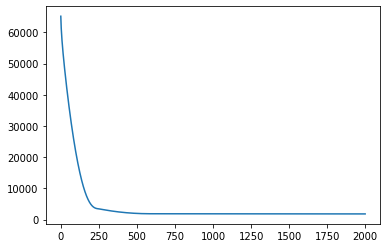

In [174]:
plt.plot(hist.history['loss'])
plt.show()

In [175]:
model.predict(np.array([100, 40]).reshape(1,2))  # 100kg, age 40
# array([[348.73917]], dtype=float32)

array([[348.74435]], dtype=float32)

In [176]:
model.predict(np.array([60, 25]).reshape(1,2))  # 60kg, age 25
# array([[222.32826]], dtype=float32)

array([[222.32521]], dtype=float32)

In [177]:
W_, b_ = model.get_weights()
print(W_)  # 기울기(weight)
# [[1.0951027]
#  [5.50712  ]]
print(b_)  # 절편, bias

[[1.0952797]
 [5.5071955]]
[18.928545]


In [178]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70 , 50).reshape(50, 1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_  # matrix multiply, 행렬 곱

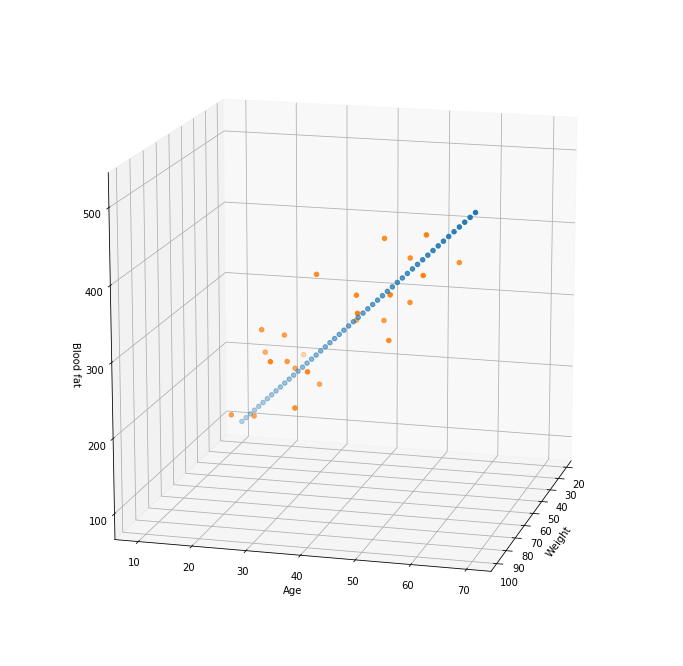

In [179]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, Z)
ax.scatter(xs, ys, zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)

plt.show()

In [180]:
# end day08